Create a tiny dask array with random integers and examine the underlying graph structure:

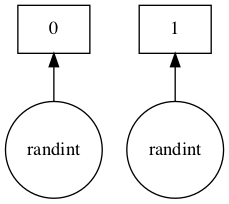

In [1]:
import dask.array as da
da.random.randint(0,255, size=(2,), chunks=(1,)).visualize()

Changing the chunking of the array alters the task graph:

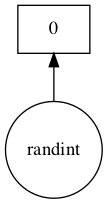

In [2]:
da.random.randint(0,255, size=(2,), chunks=(2,)).visualize()

Create a 64 GB dask array (on a laptop with 8 GB of RAM):

In [12]:
arr_big = da.random.randint(0, 255, size= 3 * (2000,), chunks= 3 * (250,))
arr_big

dask.array<randint, shape=(2000, 2000, 2000), dtype=int64, chunksize=(250, 250, 250), chunktype=numpy.ndarray>

Indexing this array returns another dask array, not data:

In [13]:
arr_big[0,0,:]

dask.array<getitem, shape=(2000,), dtype=int64, chunksize=(250,), chunktype=numpy.ndarray>

All the basic dask array functions are lazy; use the `compute` method to get values out of the array.

In [14]:
print(arr_big[0,0,:].compute())

[227 218 116 ...  66  91  14]


For modifying dask arrays, arithmetic operators and broadcasting work in the numpy style:

In [36]:
arr_small = da.random.randint(0, 255, size= (4,), chunks= (1,))
mn, mx = arr_small.min(), arr_small.max()
rescaled = (arr_small - mn) / (mx - mn)

In [35]:
rescaled_arr.visualize(optimize_graph=True, filename='normalize.png');

image processing often involves applying filters to 